In [34]:
import pandas as pd
import numpy as np
import mplfinance as mpf
import yfinance as yf
import pandas_ta as ta
import seaborn as sns
import matplotlib.pyplot as plt

# Import

In [35]:
data = yf.download("^GDAXI", interval="1d", start="2000-01-01", end="2024-01-23")

[*********************100%%**********************]  1 of 1 completed


In [36]:
data.columns = ['open','high','low','close','adj_close','volume']
data

,open,high,low,close,adj_close,volume
Date,,,,,,
2000-01-03,6961.720215,7159.330078,6720.870117,6750.759766,6750.759766,43072500
2000-01-04,6747.240234,6755.359863,6510.459961,6586.950195,6586.950195,46678400
2000-01-05,6585.850098,6585.850098,6388.910156,6502.069824,6502.069824,52682800
2000-01-06,6501.450195,6539.310059,6402.629883,6474.919922,6474.919922,41180600
2000-01-07,6489.939941,6791.529785,6470.140137,6780.959961,6780.959961,56058900
...,...,...,...,...,...,...
2024-01-16,16497.539062,16581.929688,16476.089844,16571.679688,16571.679688,73101900
2024-01-17,16400.419922,16435.679688,16345.019531,16431.689453,16431.689453,71437800
2024-01-18,16440.660156,16579.119141,16421.199219,16567.349609,16567.349609,72318600


# Missing Values

In [37]:
data.isna().sum()

open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

In [38]:
zero = data==0
zero.sum()

open         0
high         0
low          0
close        0
adj_close    0
volume       9
dtype: int64

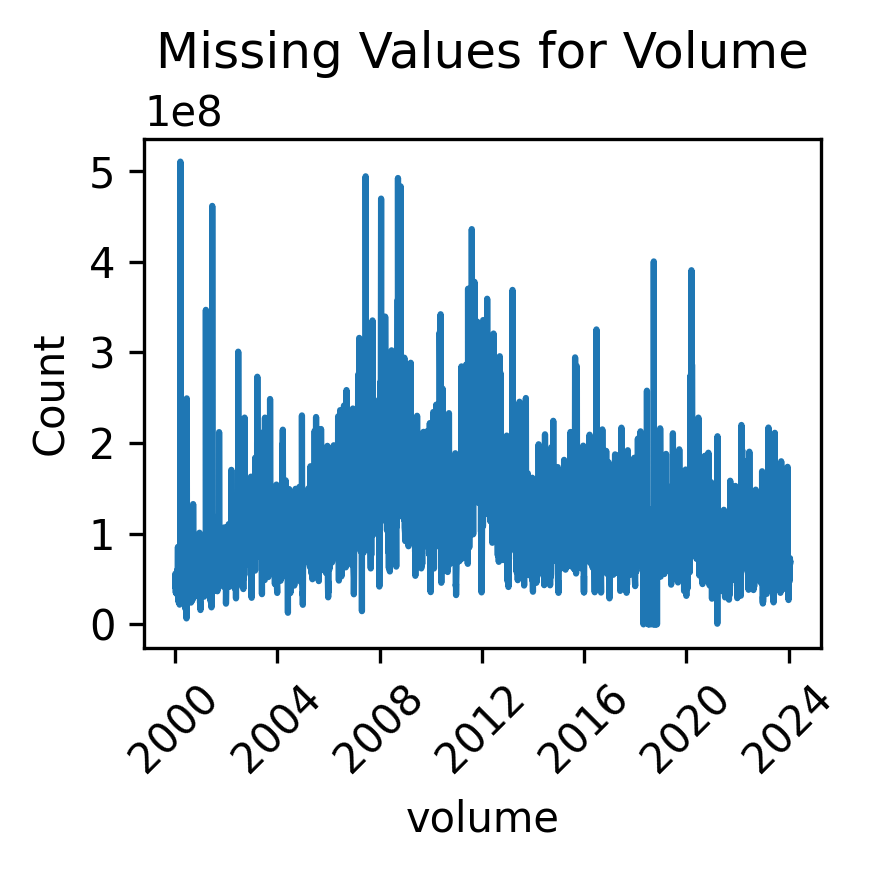

In [39]:
fig, ax = plt.subplots(1,1, figsize=(3,3), dpi=300)
sns.lineplot(data=data, x=data.index, y='volume')
ax.set_ylabel("Count") 
ax.set_xlabel("volume") 
ax.set_title("Missing Values for Volume") 
plt.xticks(rotation=45)#ticks=data.index[::2]
plt.tight_layout()
#plt.savefig("../plots/missing_values_in_vol_before_2000.png")

# Calculating Direction

In [40]:
data['direction_num'] = data['close'] - data['open']
data['direction'] = [1 if value > 0 else 0 for value in data['direction_num']]
data.head()

,open,high,low,close,adj_close,volume,direction_num,direction
Date,,,,,,,,
2000-01-03,6961.720215,7159.330078,6720.870117,6750.759766,6750.759766,43072500,-210.960449,0
2000-01-04,6747.240234,6755.359863,6510.459961,6586.950195,6586.950195,46678400,-160.290039,0
2000-01-05,6585.850098,6585.850098,6388.910156,6502.069824,6502.069824,52682800,-83.780273,0
2000-01-06,6501.450195,6539.310059,6402.629883,6474.919922,6474.919922,41180600,-26.530273,0
2000-01-07,6489.939941,6791.529785,6470.140137,6780.959961,6780.959961,56058900,291.020020,1


# Checking Adj Close difference

In [41]:
data['adj_diff'] = data['adj_close'] - data['close']
data['adj_diff'].value_counts() 

adj_diff
0.0    6109
Name: count, dtype: int64

##### diff is 0 in every row. Therefore I can drop the column "adj_close" because its has the same Information is in column "close"

In [42]:
#data.drop(['adj_close','adj_diff'], axis=1, inplace=True)
data.head()

,open,high,low,close,adj_close,volume,direction_num,direction,adj_diff
Date,,,,,,,,,
2000-01-03,6961.720215,7159.330078,6720.870117,6750.759766,6750.759766,43072500,-210.960449,0,0.0
2000-01-04,6747.240234,6755.359863,6510.459961,6586.950195,6586.950195,46678400,-160.290039,0,0.0
2000-01-05,6585.850098,6585.850098,6388.910156,6502.069824,6502.069824,52682800,-83.780273,0,0.0
2000-01-06,6501.450195,6539.310059,6402.629883,6474.919922,6474.919922,41180600,-26.530273,0,0.0
2000-01-07,6489.939941,6791.529785,6470.140137,6780.959961,6780.959961,56058900,291.020020,1,0.0


# Calc Indicators

In [43]:
l_low = 3
l_mid = 7
l_high = 14
offset = 1
#SMA
data[f'sma_{l_low}']=data.ta.sma(length=l_low, offset=offset)
data[f'sma_{l_mid}']=data.ta.sma(length=l_mid, offset=offset)
data[f'sma_{l_high}']=data.ta.sma(length=l_high, offset=offset)
#EMA
data[f'ema_{l_low}']=data.ta.ema(length=l_low, offset=offset)
data[f'ema_{l_mid}']=data.ta.ema(length=l_mid, offset=offset)
data[f'ema_{l_high}']=data.ta.ema(length=l_high, offset=offset)
#MACD
data[['MACD_12_26_9','MACDh_12_26_9','MACDs_12_26_9']] = data.ta.macd(offset=offset)
#RSI
data[f'rsi_{l_low}']=data.ta.rsi(length=l_low, offset=offset)
data[f'rsi_{l_mid}']=data.ta.rsi(length=l_mid, offset=offset)
data[f'rsi_{l_high}']=data.ta.rsi(length=l_high, offset=offset)
#BBANDS
data[[f'BBL_{l_low}_2.0',f'BBM_{l_low}_2.0',f'BBU_{l_low}_2.0',f'BBB_{l_low}_2.0',f'BBP_{l_low}_2.0']] = data.ta.bbands(length=l_low, offset=offset)
data[[f'BBL_{l_mid}_2.0',f'BBM_{l_mid}_2.0',f'BBU_{l_mid}_2.0',f'BBB_{l_mid}_2.0',f'BBP_{l_mid}_2.0']] = data.ta.bbands(length=l_mid, offset=offset)
data[[f'BBL_{l_high}_2.0',f'BBM_{l_high}_2.0',f'BBU_{l_high}_2.0',f'BBB_{l_high}_2.0',f'BBP_{l_high}_2.0']] = data.ta.bbands(length=l_high, offset=offset)
#STOCH
data[['STOCHk_14_3_3','STOCHd_14_3_3']] = data.ta.stoch(offset=offset)
#ATR
data[f'atr_{l_low}']=data.ta.atr(length=l_low, offset=offset)
data[f'atr_{l_mid}']=data.ta.atr(length=l_mid, offset=offset)
data[f'atr_{l_high}']=data.ta.atr(length=l_high, offset=offset)
#psar
data[['PSARl_0.02_0.2','PSARs_0.02_0.2','PSARaf_0.02_0.2','PSARr_0.02_0.2']] = data.ta.psar(l_low, offset=offset)
#cmf
data[f'cmf_{l_low}']=data.ta.cmf(length=l_low, offset=offset)
data[f'cmf_{l_mid}']=data.ta.cmf(length=l_mid, offset=offset)
data[f'cmf_{l_high}']=data.ta.cmf(length=l_high, offset=offset)
#adx
data[[f'ADX_{l_low}',f'DMP_{l_low}',f'DMN_{l_low}']] = data.ta.macd(length=l_low, offset=offset)
data[[f'ADX_{l_mid}',f'DMP_{l_mid}',f'DMN_{l_mid}']] = data.ta.macd(length=l_mid, offset=offset)
data[[f'ADX_{l_high}',f'DMP_{l_high}',f'DMN_{l_high}']] = data.ta.macd(length=l_high, offset=offset)

In [44]:
data.head()

,open,high,low,close,adj_close,volume,direction_num,direction,adj_diff,sma_3,...,cmf_14,ADX_3,DMP_3,DMN_3,ADX_7,DMP_7,DMN_7,ADX_14,DMP_14,DMN_14
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,6961.720215,7159.330078,6720.870117,6750.759766,6750.759766,43072500,-210.960449,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,6747.240234,6755.359863,6510.459961,6586.950195,6586.950195,46678400,-160.290039,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,6585.850098,6585.850098,6388.910156,6502.069824,6502.069824,52682800,-83.780273,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,6501.450195,6539.310059,6402.629883,6474.919922,6474.919922,41180600,-26.530273,0,0.0,6613.259928,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,6489.939941,6791.529785,6470.140137,6780.959961,6780.959961,56058900,291.020020,1,0.0,6521.313314,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
#data.ta.adx(length=l_low, offset=offset)

In [46]:
#data.ta.cdl_pattern(name="all")

In [47]:
#data.ta.indicators()

# Dropping NaNs

In [48]:
#data.isna().sum()

In [49]:
data.drop(['PSARl_0.02_0.2','PSARs_0.02_0.2'],axis=1, inplace=True)

In [50]:
data.dropna(inplace=True)

In [51]:
#data

# Shifting Data backwards

# EDA

In [52]:
len(data.columns.tolist())

55

In [53]:
'''
n = len(data.columns.tolist())
i = 0
fig, ax = plt.subplots(n,1, figsize=(10,n+10), dpi=300)
for col in data.columns:
    sns.histplot(data=data, x=col, ax=ax[i])
    ax[i].set_ylabel("Count") 
    ax[i].set_xlabel(col) 
    i += 1
#plt.xticks(rotation=45)#ticks=data.index[::2]
plt.rcParams
plt.tight_layout()
plt.show()
'''

'\nn = len(data.columns.tolist())\ni = 0\nfig, ax = plt.subplots(n,1, figsize=(10,n+10), dpi=300)\nfor col in data.columns:\n    sns.histplot(data=data, x=col, ax=ax[i])\n    ax[i].set_ylabel("Count") \n    ax[i].set_xlabel(col) \n    i += 1\n#plt.xticks(rotation=45)#ticks=data.index[::2]\nplt.rcParams\nplt.tight_layout()\nplt.show()\n'

# Convert to catergorical columns

In [54]:
list_of_col_to_convert=[f'sma_{l_low}',f'sma_{l_mid}',f'sma_{l_high}',
                        f'ema_{l_low}',f'ema_{l_mid}',f'ema_{l_high}',
                        f'BBL_{l_low}_2.0',f'BBM_{l_low}_2.0',f'BBU_{l_low}_2.0',f'BBP_{l_low}_2.0',
                        f'BBL_{l_mid}_2.0',f'BBM_{l_mid}_2.0',f'BBU_{l_mid}_2.0',f'BBP_{l_mid}_2.0',
                        f'BBL_{l_high}_2.0',f'BBM_{l_high}_2.0',f'BBU_{l_high}_2.0',f'BBP_{l_high}_2.0',
                        ]
list_of_col_to_convert

['sma_3',
 'sma_7',
 'sma_14',
 'ema_3',
 'ema_7',
 'ema_14',
 'BBL_3_2.0',
 'BBM_3_2.0',
 'BBU_3_2.0',
 'BBP_3_2.0',
 'BBL_7_2.0',
 'BBM_7_2.0',
 'BBU_7_2.0',
 'BBP_7_2.0',
 'BBL_14_2.0',
 'BBM_14_2.0',
 'BBU_14_2.0',
 'BBP_14_2.0']

In [55]:
threshold = 'close'
for col in list_of_col_to_convert:
    data['pos_{}'.format(col)] = np.where(data[col] > data[threshold], 1, 0)

In [56]:
data.columns

Index(['open', 'high', 'low', 'close', 'adj_close', 'volume', 'direction_num',
       'direction', 'adj_diff', 'sma_3', 'sma_7', 'sma_14', 'ema_3', 'ema_7',
       'ema_14', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'rsi_3',
       'rsi_7', 'rsi_14', 'BBL_3_2.0', 'BBM_3_2.0', 'BBU_3_2.0', 'BBB_3_2.0',
       'BBP_3_2.0', 'BBL_7_2.0', 'BBM_7_2.0', 'BBU_7_2.0', 'BBB_7_2.0',
       'BBP_7_2.0', 'BBL_14_2.0', 'BBM_14_2.0', 'BBU_14_2.0', 'BBB_14_2.0',
       'BBP_14_2.0', 'STOCHk_14_3_3', 'STOCHd_14_3_3', 'atr_3', 'atr_7',
       'atr_14', 'PSARaf_0.02_0.2', 'PSARr_0.02_0.2', 'cmf_3', 'cmf_7',
       'cmf_14', 'ADX_3', 'DMP_3', 'DMN_3', 'ADX_7', 'DMP_7', 'DMN_7',
       'ADX_14', 'DMP_14', 'DMN_14', 'pos_sma_3', 'pos_sma_7', 'pos_sma_14',
       'pos_ema_3', 'pos_ema_7', 'pos_ema_14', 'pos_BBL_3_2.0',
       'pos_BBM_3_2.0', 'pos_BBU_3_2.0', 'pos_BBP_3_2.0', 'pos_BBL_7_2.0',
       'pos_BBM_7_2.0', 'pos_BBU_7_2.0', 'pos_BBP_7_2.0', 'pos_BBL_14_2.0',
       'pos_BBM_14_2.0', 'pos_BBU

In [57]:
cat_col_names = [col for col in data.columns if 'pos' in col]

In [58]:
cat_col_names = pd.DataFrame(cat_col_names)

# Export

In [59]:
data

,open,high,low,close,adj_close,volume,direction_num,direction,adj_diff,sma_3,...,pos_BBU_3_2.0,pos_BBP_3_2.0,pos_BBL_7_2.0,pos_BBM_7_2.0,pos_BBU_7_2.0,pos_BBP_7_2.0,pos_BBL_14_2.0,pos_BBM_14_2.0,pos_BBU_14_2.0,pos_BBP_14_2.0
Date,,,,,,,,,,,,,,,,,,,,,
2000-02-18,7584.390137,7658.879883,7543.500000,7573.779785,7573.779785,52728400,-10.610352,0,0.0,7488.993164,...,1,0,0,1,1,0,0,0,1,0
2000-02-21,7568.339844,7590.529785,7447.709961,7590.529785,7590.529785,24404000,22.189941,1,0.0,7548.209798,...,1,0,0,0,1,0,0,0,1,0
2000-02-22,7580.379883,7725.500000,7540.359863,7607.939941,7607.939941,51082700,27.560059,1,0.0,7581.613118,...,0,0,0,0,1,0,0,0,1,0
2000-02-23,7619.830078,7772.279785,7619.830078,7698.970215,7698.970215,42673800,79.140137,1,0.0,7590.749837,...,0,0,0,0,1,0,0,0,1,0
2000-02-24,7696.919922,7813.200195,7587.080078,7640.529785,7640.529785,38686700,-56.390137,0,0.0,7632.479980,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-16,16497.539062,16581.929688,16476.089844,16571.679688,16571.679688,73101900,74.140625,1,0.0,16624.603516,...,1,0,0,1,1,0,0,1,1,0
2024-01-17,16400.419922,16435.679688,16345.019531,16431.689453,16431.689453,71437800,31.269531,1,0.0,16632.820312,...,1,0,1,1,1,0,1,1,1,0
2024-01-18,16440.660156,16579.119141,16421.199219,16567.349609,16567.349609,72318600,126.689453,1,0.0,16541.863281,...,1,0,0,1,1,0,0,1,1,0


In [60]:
data.to_csv('../data/dax_indicator_2000_2024.csv')

In [61]:
cat_col_names.to_csv('../data/temp_cat_col_names.csv')